### -- Import required packages

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import datetime as dt

In [32]:
import warnings
warnings.filterwarnings("ignore")

###  -- Retrieve raw data

In [33]:
# Charger le fichier CSV
file_path = 'World-Stock-Prices-Dataset.csv'
data = pd.read_csv(file_path)


In [34]:
print("\n**************** data overview ******** \n")
print(data.info())



**************** data overview ******** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279753 entries, 0 to 279752
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          279753 non-null  object 
 1   Open          279753 non-null  float64
 2   High          279753 non-null  float64
 3   Low           279753 non-null  float64
 4   Close         279753 non-null  float64
 5   Volume        279753 non-null  float64
 6   Dividends     279753 non-null  float64
 7   Stock Splits  279753 non-null  float64
 8   Brand_Name    279753 non-null  object 
 9   Ticker        279753 non-null  object 
 10  Industry_Tag  279753 non-null  object 
 11  Country       279753 non-null  object 
dtypes: float64(7), object(5)
memory usage: 25.6+ MB
None


### -- Preprocessing data

In [35]:
# Filtrer les données pour ne garder que celles d'Apple
apple_df = data[data['Brand_Name'] == 'apple']

# Sélectionner uniquement la colonne 'Close' et convertir la colonne 'Date'
apple_close_df = apple_df[['Date', 'Close']]


In [36]:
apple_close = apple_close_df.copy()

# Assurez que la colonne de dates est au format datetime
apple_close['Date'] = pd.to_datetime(apple_close['Date'].str.split(" ").str[0])

# Trier le DataFrame 'apple_close' par la colonne 'Date'
apple_close = apple_close.sort_values('Date')

# Ajouter une nouvelle colonne avec les noms des jours de la semaine
apple_close['Day_Name'] = apple_close['Date'].dt.day_name()


In [37]:
print("\n**************** data overview ******** \n")
print(apple_close.info())



**************** data overview ******** 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5969 entries, 19031 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5969 non-null   datetime64[ns]
 1   Close     5969 non-null   float64       
 2   Day_Name  5969 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 186.5+ KB
None


In [38]:
apple_close.set_index('Date', inplace=True)

print("\n************ data overview ****** \n")
print(apple_close)


************ data overview ****** 

                 Close   Day_Name
Date                             
2000-01-03    0.848323     Monday
2000-01-04    0.776801    Tuesday
2000-01-05    0.788168  Wednesday
2000-01-06    0.719961   Thursday
2000-01-07    0.754065     Friday
...                ...        ...
2023-09-15  175.009995     Friday
2023-09-15  175.009995     Friday
2023-09-18  177.970001     Monday
2023-09-19  179.070007    Tuesday
2023-09-20  175.490005  Wednesday

[5969 rows x 2 columns]


In [39]:
# Vérifier et gérer les doublons (garder la première occurrence)
apple_close = apple_close[~apple_close.index.duplicated(keep='first')]

In [40]:
print("\n************ data overview ****** \n")
print(apple_close)


************ data overview ****** 

                 Close   Day_Name
Date                             
2000-01-03    0.848323     Monday
2000-01-04    0.776801    Tuesday
2000-01-05    0.788168  Wednesday
2000-01-06    0.719961   Thursday
2000-01-07    0.754065     Friday
...                ...        ...
2023-09-14  175.740005   Thursday
2023-09-15  175.009995     Friday
2023-09-18  177.970001     Monday
2023-09-19  179.070007    Tuesday
2023-09-20  175.490005  Wednesday

[5966 rows x 2 columns]


In [47]:
ferq = 'Month'
apple_close = apple_close.resample('M').mean()

print("\n************ data overview ****** \n")
print(apple_close)


************ data overview ****** 

                 Close
Date                  
2000-01-31    0.783313
2000-02-29    0.846055
2000-03-31    0.973863
2000-04-30    0.932958
2000-05-31    0.763995
...                ...
2023-05-31  172.293533
2023-06-30  184.034816
2023-07-31  192.152022
2023-08-31  180.997362
2023-09-30  179.555002

[285 rows x 1 columns]


In [49]:
if ferq == 'Day':    
    # Créer un index complet de dates
    start_date = apple_close.index.min()
    end_date = apple_close.index.max()
    full_index = pd.date_range(start=start_date, end=end_date, freq='D')  # 'D' pour quotidien

    # Réindexer le DataFrame original avec l'index complet
    apple_close = apple_close.reindex(full_index)

    # Update Day_name column to fill gaps
    apple_close['Day_Name'] = apple_close.index.day_name()

    print("\n************ data overview ****** \n")
    print(apple_close)

In [50]:
if ferq == 'Day':   
    # Appliquer fill forward pour remplir les lacunes
    apple_close.fillna(method='ffill', inplace=True)
    
    print("\n************* data overview ****** \n")
    print(apple_close)

    apple_close.drop('Day_Name', axis=1, inplace=True)

In [14]:
apple_close = apple_close[apple_close.index >= "2018-09-15"]

In [52]:
apple_close.index



DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30'],
              dtype='datetime64[ns]', name='Date', length=285, freq='M')

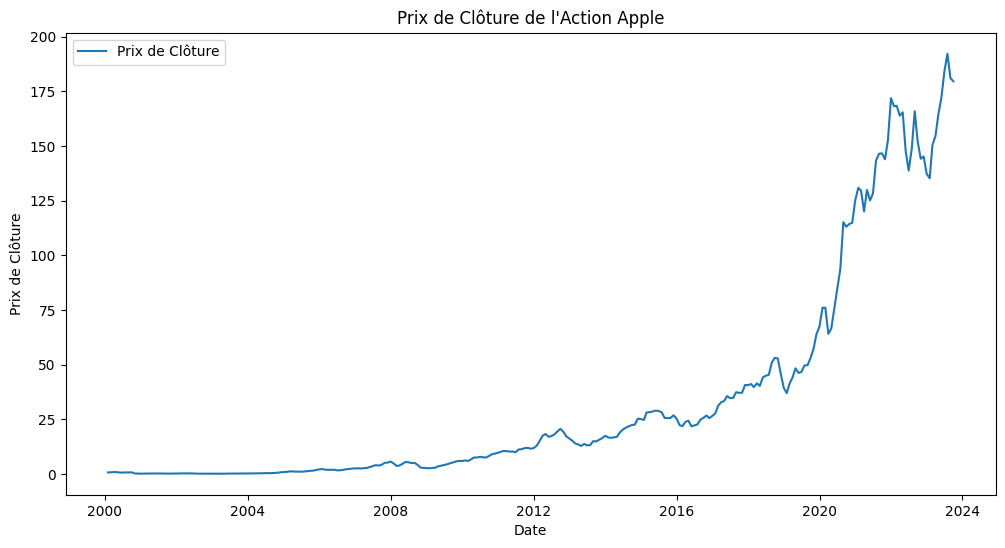

In [53]:
# Visualisation des données après la gestion des doublons et des valeurs manquantes
plt.figure(figsize=(12, 6))
plt.plot(apple_close, label='Prix de Clôture')
plt.title('Prix de Clôture de l\'Action Apple')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()
plt.show()

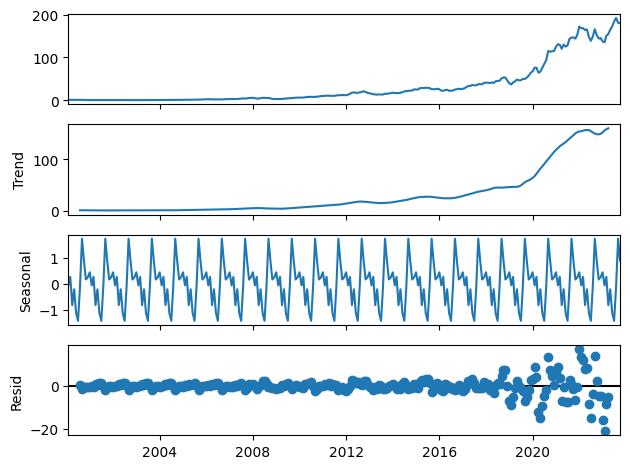

In [54]:
# Décomposition saisonnière pour observer le trend et la saisonnalité
decomposition = sm.tsa.seasonal_decompose(apple_close, model='additive')
fig = decomposition.plot()
plt.show()

In [55]:
# Test ADF
adf_test = adfuller(apple_close['Close'])
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p_value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value

# Afficher les résultats du test ADF
print(adf_output)
# Displaying if the series is stationary or not
p_value = adf_test[1]
if p_value <0.05:
    print("\n===> The original time serie is stationary.")
else:
    print("\n===> The original time serie is not stationary .")

Test Statistic                   2.904318
p_value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    271.000000
Critical Value (1%)             -3.454713
Critical Value (5%)             -2.872265
Critical Value (10%)            -2.572485
dtype: float64

===> The original time serie is not stationary .


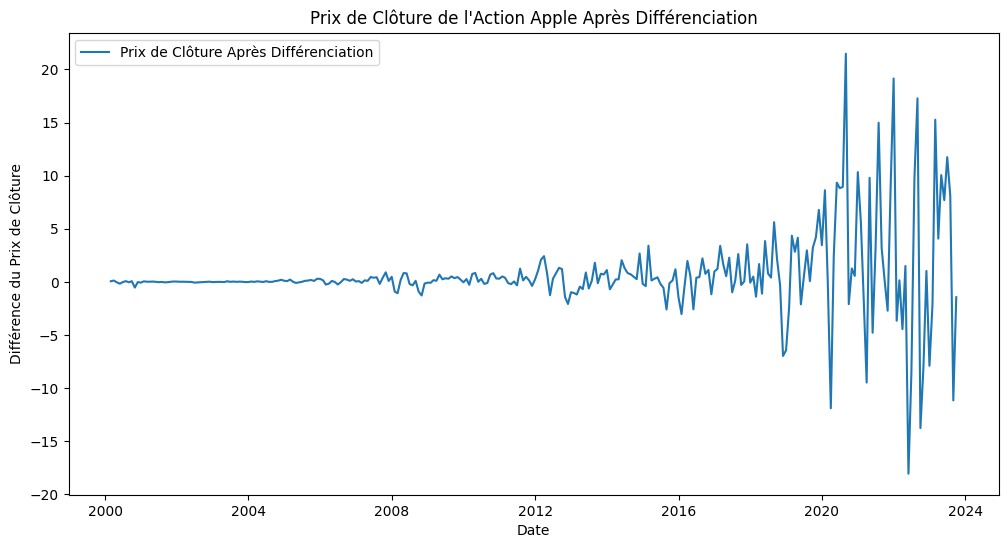

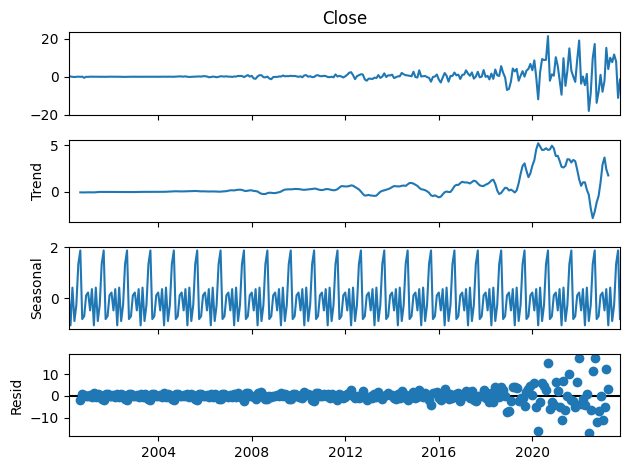

########################################### The time serie still not stationary even after 1_differenciation  ###########################################.


In [56]:
# Appliquer la différenciation
apple_diff = apple_close['Close'].diff().dropna()

# Visualisation des données différenciées
plt.figure(figsize=(12, 6))
plt.plot(apple_diff, label='Prix de Clôture Après Différenciation')
plt.title('Prix de Clôture de l\'Action Apple Après Différenciation')
plt.xlabel('Date')
plt.ylabel('Différence du Prix de Clôture')
plt.legend()
plt.show()

# Décomposition saisonnière des données différenciées
decomposition_diff = sm.tsa.seasonal_decompose(apple_diff, model='additive')
fig_diff = decomposition_diff.plot()
plt.show()

# Test ADF sur les données différenciées
adf_test_diff = adfuller(apple_diff)
adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_output_diff['Critical Value (%s)' % key] = value

# Afficher les résultats du test ADF sur les données différenciées
adf_output_diff
# Displaying if the series is stationary or not
p_value = adf_output_diff[1]
if p_value <0.05:
    print("########################################### The time serie is stationary after 1_differenciation ###########################################.")
else:
    print("########################################### The time serie still not stationary even after 1_differenciation  ###########################################.")

## Ajustement du modèle

In [57]:
# Définir le point de division (80% pour le traitement, 20% pour le test)
split_point = int(len(data) * 0.8)

# Diviser les données en ensembles de traitement et de test
train_df = apple_diff.iloc[:split_point]
test_df = apple_diff[split_point:]

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools

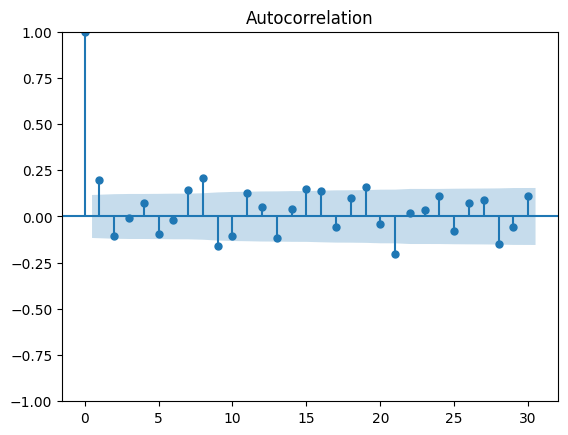

In [59]:
# Plot ACF
plot_acf(train_df, lags=30)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  284
Model:                ARIMA(0, 0, 21)   Log Likelihood                -726.542
Date:                Sun, 26 Nov 2023   AIC                           1499.085
Time:                        18:03:33   BIC                           1583.011
Sample:                    02-29-2000   HQIC                          1532.733
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7280      0.521      1.398      0.162      -0.293       1.749
ma.L1          0.3500      0.067      5.214      0.000       0.218       0.482
ma.L2         -0.1271      0.071     -1.791      0.0

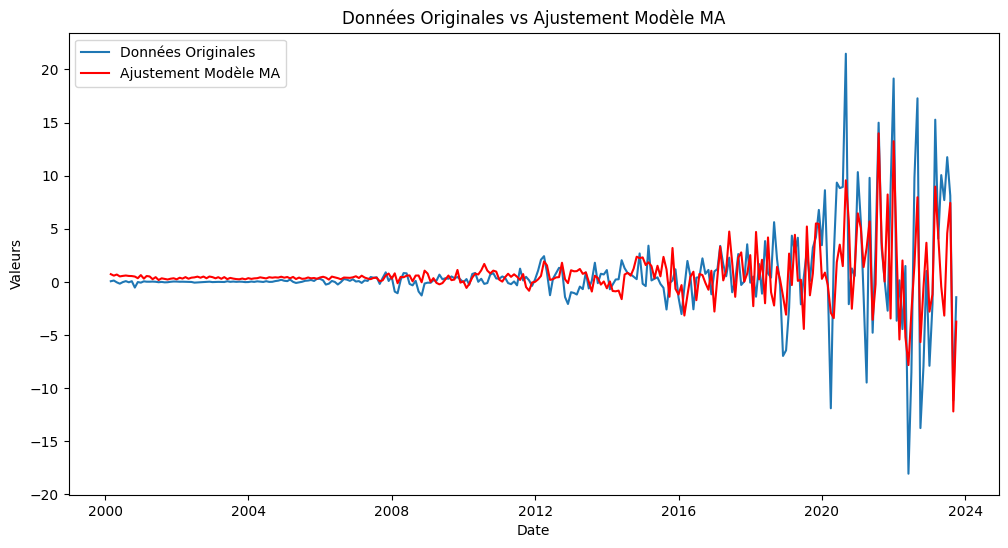

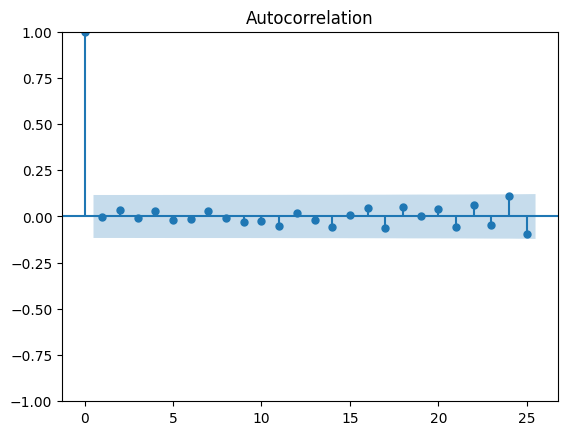

In [64]:
# Ajuster le modèle MA en utilisant un ordre choisi basé sur l'ACF
q=21
model_ma = ARIMA(train_df, order=(0, 0, q))
results_ma = model_ma.fit()

# Afficher le résumé du modèle
print(results_ma.summary())
# Récupérer les ajustements du modèle
fitted_values_ma = results_ma.fittedvalues

# Créer le graphique des données et de l'ajustement
plt.figure(figsize=(12, 6))
plt.plot(train_df, label='Données Originales')
plt.plot(fitted_values_ma, color='red', label='Ajustement Modèle MA')
plt.title('Données Originales vs Ajustement Modèle MA')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()
# Vérifier les résidus
residus_ma = results_ma.resid
plot_acf(residus_ma)
plt.show()

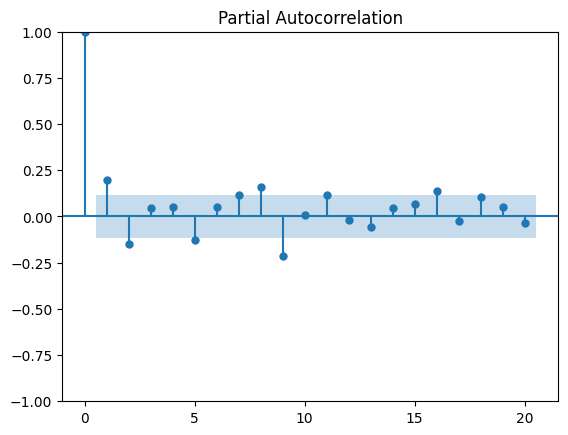

In [61]:
# Plot PACF pour déterminer l'ordre
plot_pacf(train_df, lags=20)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  284
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -759.279
Date:                Sun, 26 Nov 2023   AIC                           1540.558
Time:                        18:04:04   BIC                           1580.697
Sample:                    02-29-2000   HQIC                          1556.650
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6440      0.362      1.777      0.076      -0.066       1.354
ar.L1          0.2563      0.033      7.749      0.000       0.192       0.321
ar.L2         -0.1389      0.034     -4.129      0.0

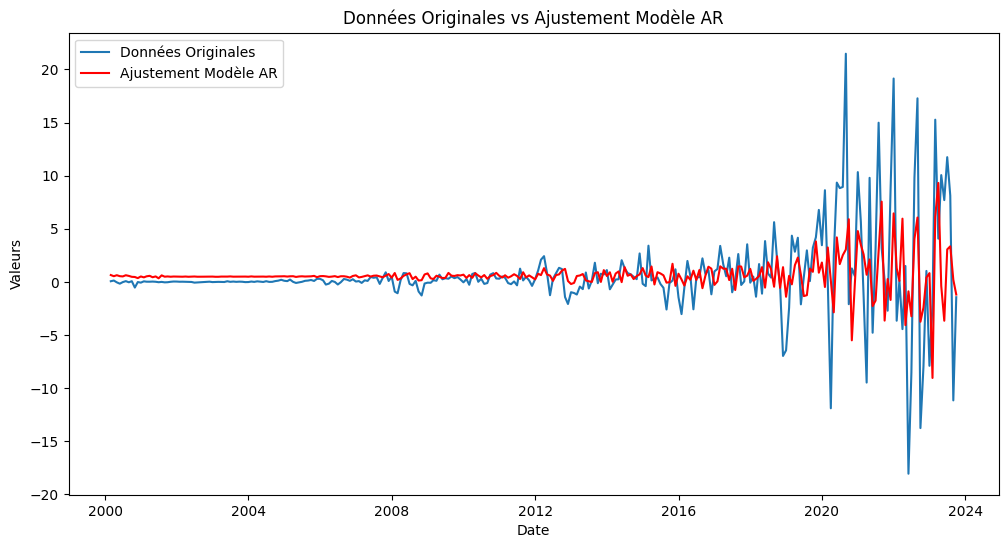

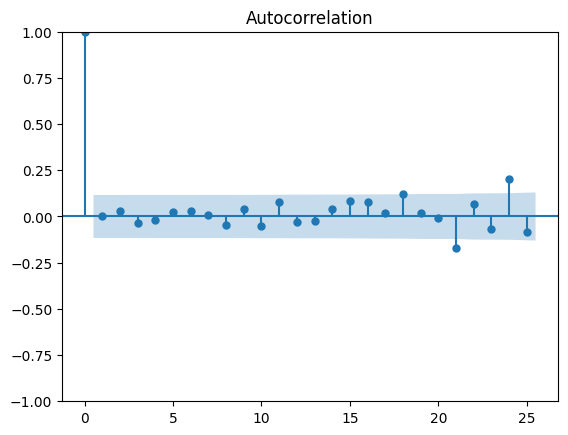

In [65]:
# Ajuster le modèle AR avec l'ordre choisi
p = 9 
model_ar = ARIMA(train_df, order=(p, 0, 0))
results_ar = model_ar.fit()

# Afficher le résumé du modèle
print(results_ar.summary())
# Récupérer les ajustements du modèle
fitted_values = results_ar.fittedvalues

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(train_df, label='Données Originales')
plt.plot(fitted_values, color='red', label='Ajustement Modèle AR')
plt.title('Données Originales vs Ajustement Modèle AR')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()
# Vérifier les résidus
residus_ar = results_ar.resid
plot_acf(residus_ar)
plt.show()

Meilleur modèle ARMA(p,q): p=17, q=24, AIC=1469.686778868626
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  284
Model:               ARIMA(17, 0, 24)   Log Likelihood                -691.843
Date:                Sun, 26 Nov 2023   AIC                           1469.687
Time:                        18:58:02   BIC                           1626.593
Sample:                    02-29-2000   HQIC                          1532.594
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6914      1.318      0.525      0.600      -1.892       3.275
ar.L1          0.0016      0.287      0.006      0.996      -0.562    

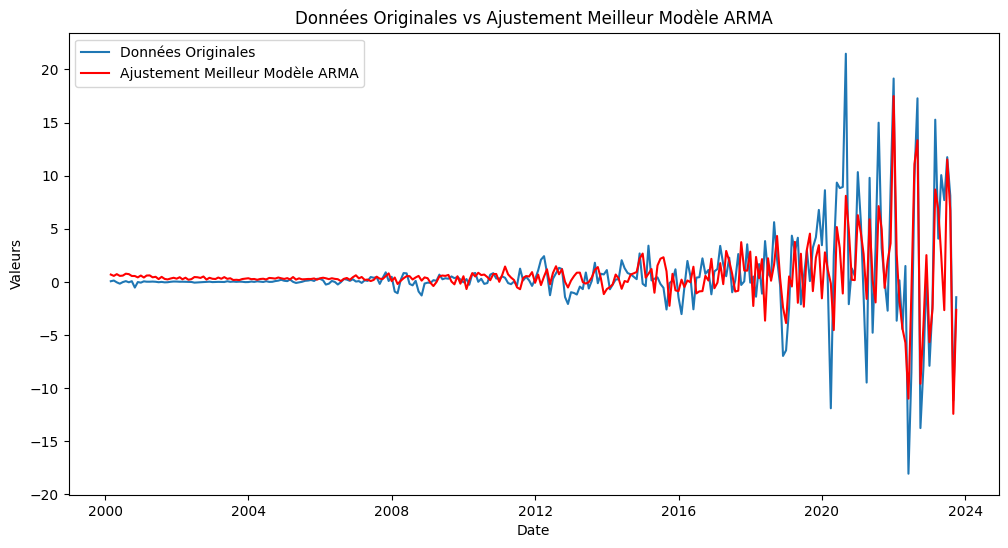

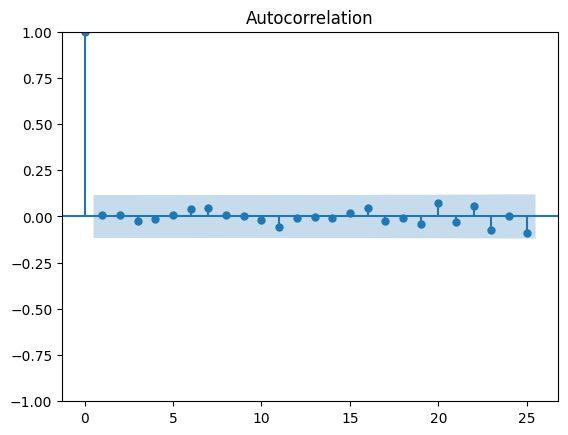

In [68]:
import itertools
# Définir les plages des ordres p et q
p = range(8, 25)  # Exemple : de 0 à 5
q = range(8, 25)  # Exemple : de 0 à 5
pq = itertools.product(p, q)

# Chercher le meilleur modèle ARMA
best_aic = float('inf')
best_order = None
best_model = None

for order in pq:
    try:
        model_temp = ARIMA(train_df, order=(order[0], 0, order[1]))
        results_temp = model_temp.fit()
        if results_temp.aic < best_aic:
            best_aic = results_temp.aic
            best_order = order
            best_model = results_temp
    except: 
        continue

# Afficher le meilleur modèle ARMA trouvé
print('Meilleur modèle ARMA(p,q): p={}, q={}, AIC={}'.format(best_order[0], best_order[1], best_aic))

# Afficher le résumé du meilleur modèle ARMA
print(best_model.summary())

# Récupérer les ajustements du meilleur modèle
fitted_values_arma = best_model.fittedvalues

# Créer le graphique des données et de l'ajustement
plt.figure(figsize=(12, 6))
plt.plot(train_df, label='Données Originales')
plt.plot(fitted_values_arma, color='red', label='Ajustement Meilleur Modèle ARMA')
plt.title('Données Originales vs Ajustement Meilleur Modèle ARMA')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

# Vérifier les résidus du meilleur modèle
residus_arma = best_model.resid
plot_acf(residus_arma)
plt.show()


Meilleur modèle ARMA(p,q): p=21, q=9, AIC=1503.8907748512247
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  284
Model:                 ARIMA(9, 0, 9)   Log Likelihood                -731.945
Date:                Sun, 26 Nov 2023   AIC                           1503.891
Time:                        18:05:48   BIC                           1576.870
Sample:                    02-29-2000   HQIC                          1533.150
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6829      0.749      0.912      0.362      -0.785       2.151
ar.L1          0.3278      0.443      0.741      0.459      -0.540    

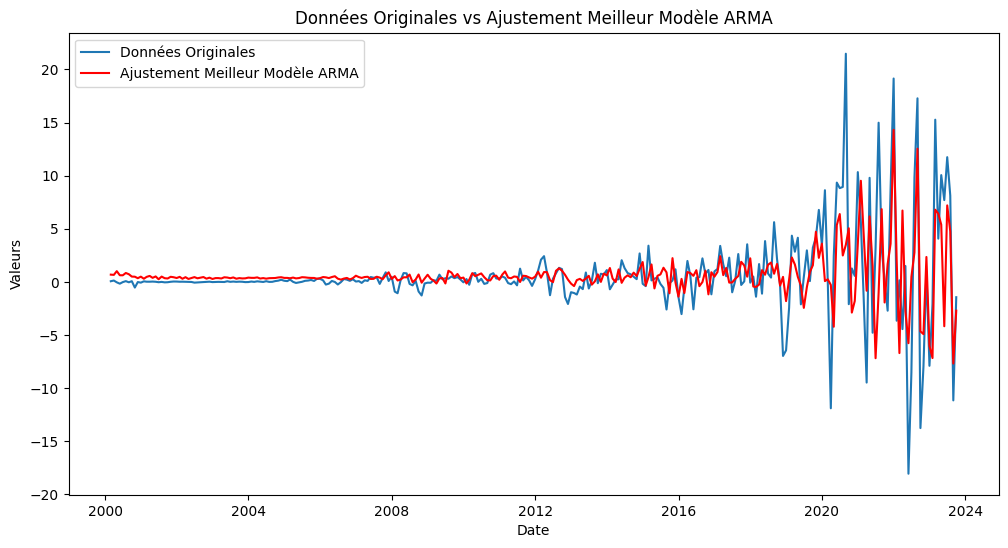

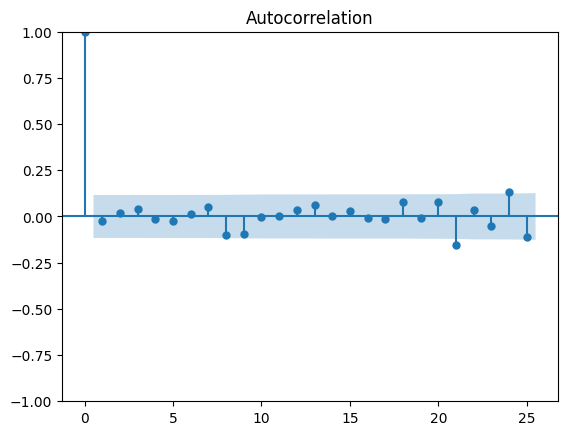

In [67]:
# Afficher le meilleur modèle ARMA trouvé
print('Meilleur modèle ARMA(p,q): p={}, q={}, AIC={}'.format(21, 9, best_aic))

# Afficher le résumé du meilleur modèle ARMA
print(best_model.summary())

# Récupérer les ajustements du meilleur modèle
fitted_values_arma = best_model.fittedvalues

# Créer le graphique des données et de l'ajustement
plt.figure(figsize=(12, 6))
plt.plot(train_df, label='Données Originales')
plt.plot(fitted_values_arma, color='red', label='Ajustement Meilleur Modèle ARMA')
plt.title('Données Originales vs Ajustement Meilleur Modèle ARMA')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

# Vérifier les résidus du meilleur modèle
residus_arma = best_model.resid
plot_acf(residus_arma)
plt.show()

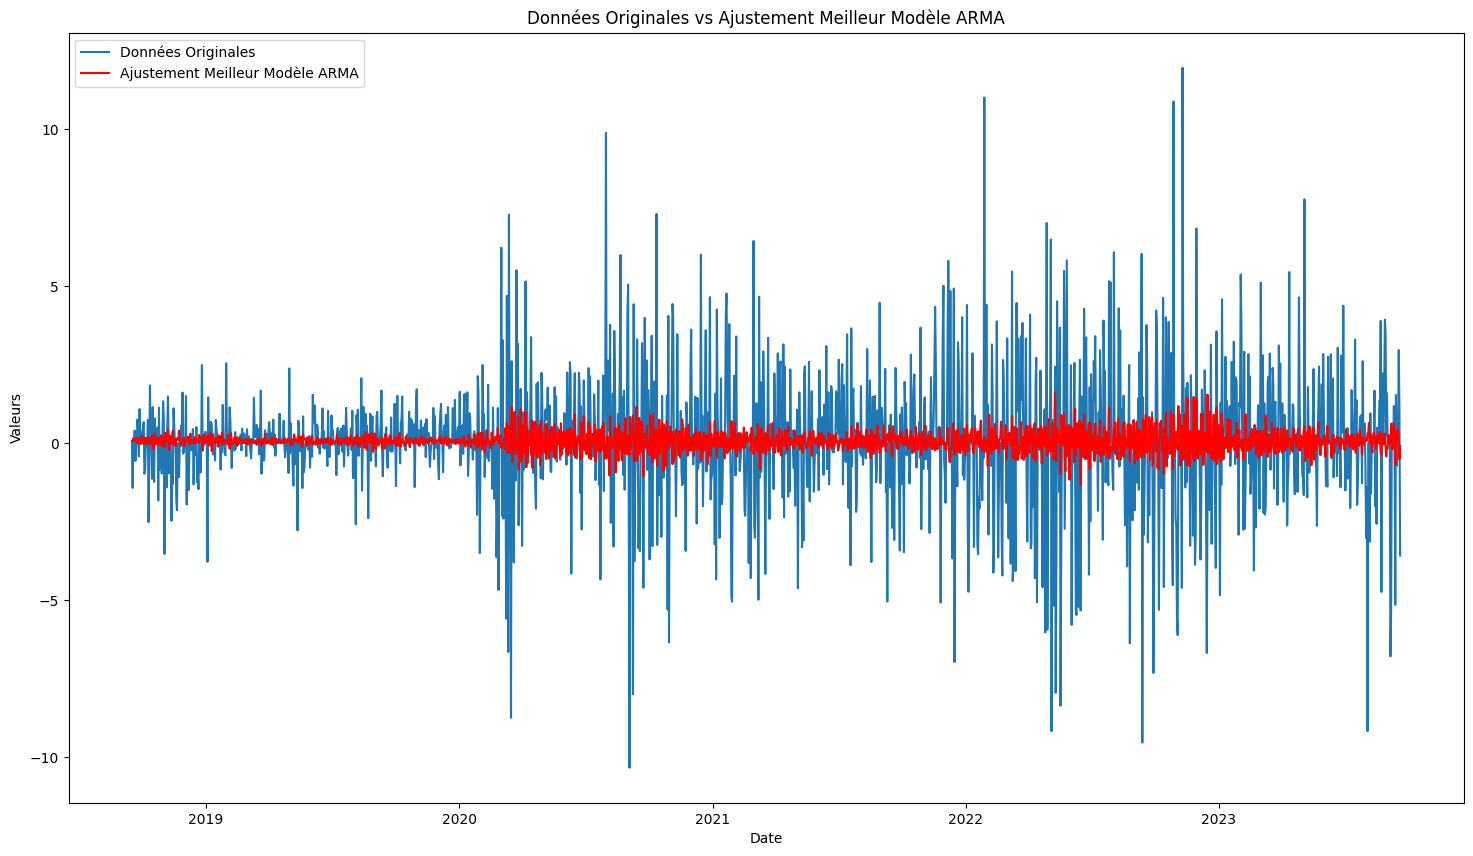

In [30]:
# Créer le graphique des données et de l'ajustement
plt.figure(figsize=(18, 10))
plt.plot(train_df, label='Données Originales')
plt.plot(fitted_values_arma, color='red', label='Ajustement Meilleur Modèle ARMA')
plt.title('Données Originales vs Ajustement Meilleur Modèle ARMA')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

In [69]:
# Récupération du AIC
aic_ma = results_ma.aic
print("AIC pour le modèle MA:", aic_ma)
aic_ar = results_ar.aic
print("AIC pour le modèle AR:", aic_ar)
print("AIC pour le modèle ARMA:", best_aic)

AIC pour le modèle MA: 1499.0848292781905
AIC pour le modèle AR: 1540.5580564824813
AIC pour le modèle ARMA: 1469.686778868626


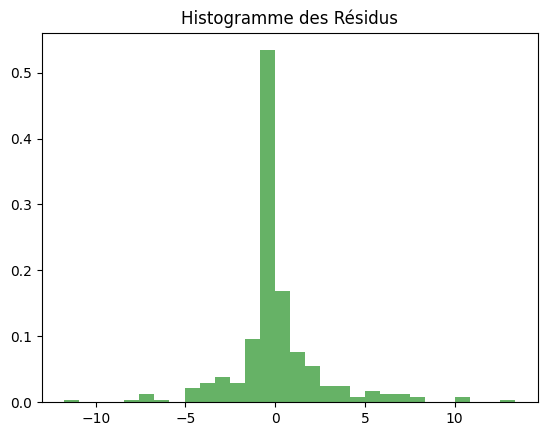

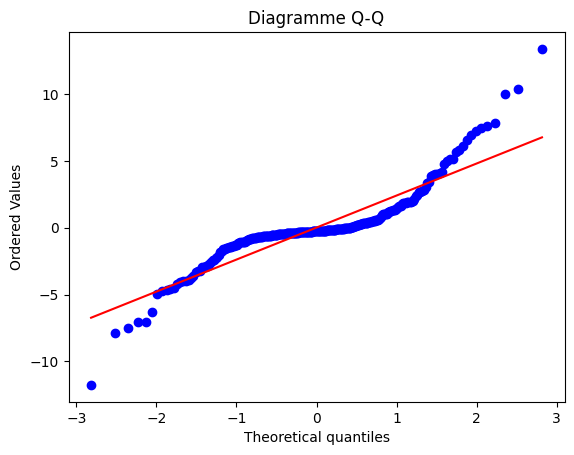

In [71]:
import scipy.stats as stats
# Histogramme
plt.hist(residus_arma, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogramme des Résidus')
plt.show()

# Diagramme Q-Q
stats.probplot(residus_arma, dist="norm", plot=plt)
plt.title('Diagramme Q-Q')
plt.show()

In [72]:
from arch import arch_model
garch11 = arch_model(residus_arma, vol='Garch', p=1, q=1)
results_garch11 = garch11.fit(update_freq=10)

print(results_garch11.summary())

Iteration:     10,   Func. Count:     67,   Neg. LLF: 392.40967316387207
Optimization terminated successfully    (Exit mode 0)
            Current function value: 392.3881400552774
            Iterations: 15
            Function evaluations: 102
            Gradient evaluations: 15
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -392.388
Distribution:                  Normal   AIC:                           792.776
Method:            Maximum Likelihood   BIC:                           807.372
                                        No. Observations:                  284
Date:                Sun, Nov 26 2023   Df Residuals:                      283
Time:                        23:56:28   Df Model:                            1
      

In [73]:
arch1 = arch_model(residus_arma, vol='ARCH', p=1)
results_arch1 = arch1.fit(update_freq=10)
print(results_arch1.summary())


Optimization terminated successfully    (Exit mode 0)
            Current function value: 602.6323713474201
            Iterations: 7
            Function evaluations: 34
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -602.632
Distribution:                  Normal   AIC:                           1211.26
Method:            Maximum Likelihood   BIC:                           1222.21
                                        No. Observations:                  284
Date:                Mon, Nov 27 2023   Df Residuals:                      283
Time:                        00:01:29   Df Model:                            1
                               Mean Model                               
         

In [74]:
alpha_pvalue = results_arch1.pvalues['alpha[1]']
print("P-value pour α:", alpha_pvalue)

P-value pour α: 0.02979426767540319
